How have the ranking of the top 10 universities in the past 10 years have changed? 

what are the parameters because of which the rankings have changed?

Indicators and Weights for ARWU

| Criteria	| Indicator	| Code |	Weight |
|-----------|----|----|----|
| Quality of Education |	Alumni of an institution winning Nobel Prizes and Fields Medals |	Alumni	| 10% |
| Quality of Faculty |	Staff of an institution winning Nobel Prizes and Fields Medals|	Award	| 20% |
| Quality of Faculty | Highly Cited Researchers|	HiCi|	20%|
|Research Output|Papers published in Nature and Science*|N&S|20%|
|Research Output|Papers indexed in Science Citation Index-Expanded and Social Science Citation Index|	PUB|	20%|
|Per Capita Performance|	Per capita academic performance of an institution	|PCP	|10%|
|Total	|	| |	100%|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

range of ranking Harvard University : 0, mean: 1.0
range of ranking University of Cambridge : 3, mean: 3.875
range of ranking Stanford University : 1, mean: 2.1875
range of ranking University of California, Berkeley : 3, mean: 3.8125
range of ranking Massachusetts Institute of Technology (MIT) : 2, mean: 4.125
range of ranking California Institute of Technology : 3, mean: 6.9375
range of ranking Columbia University : 2, mean: 7.6875
range of ranking Princeton University : 2, mean: 6.875
range of ranking University of Chicago : 2, mean: 9.25
range of ranking University of Oxford : 3, mean: 9.125

Harvard University rank 1.0 
Stanford University rank 2.1875 
University of California, Berkeley rank 3.8125 
University of Cambridge rank 3.875 
Massachusetts Institute of Technology (MIT) rank 4.125 
Princeton University rank 6.875 
California Institute of Technology rank 6.9375 
Columbia University rank 7.6875 
University of Oxford rank 9.125 
University of Chicago rank 9.25 


We can see th

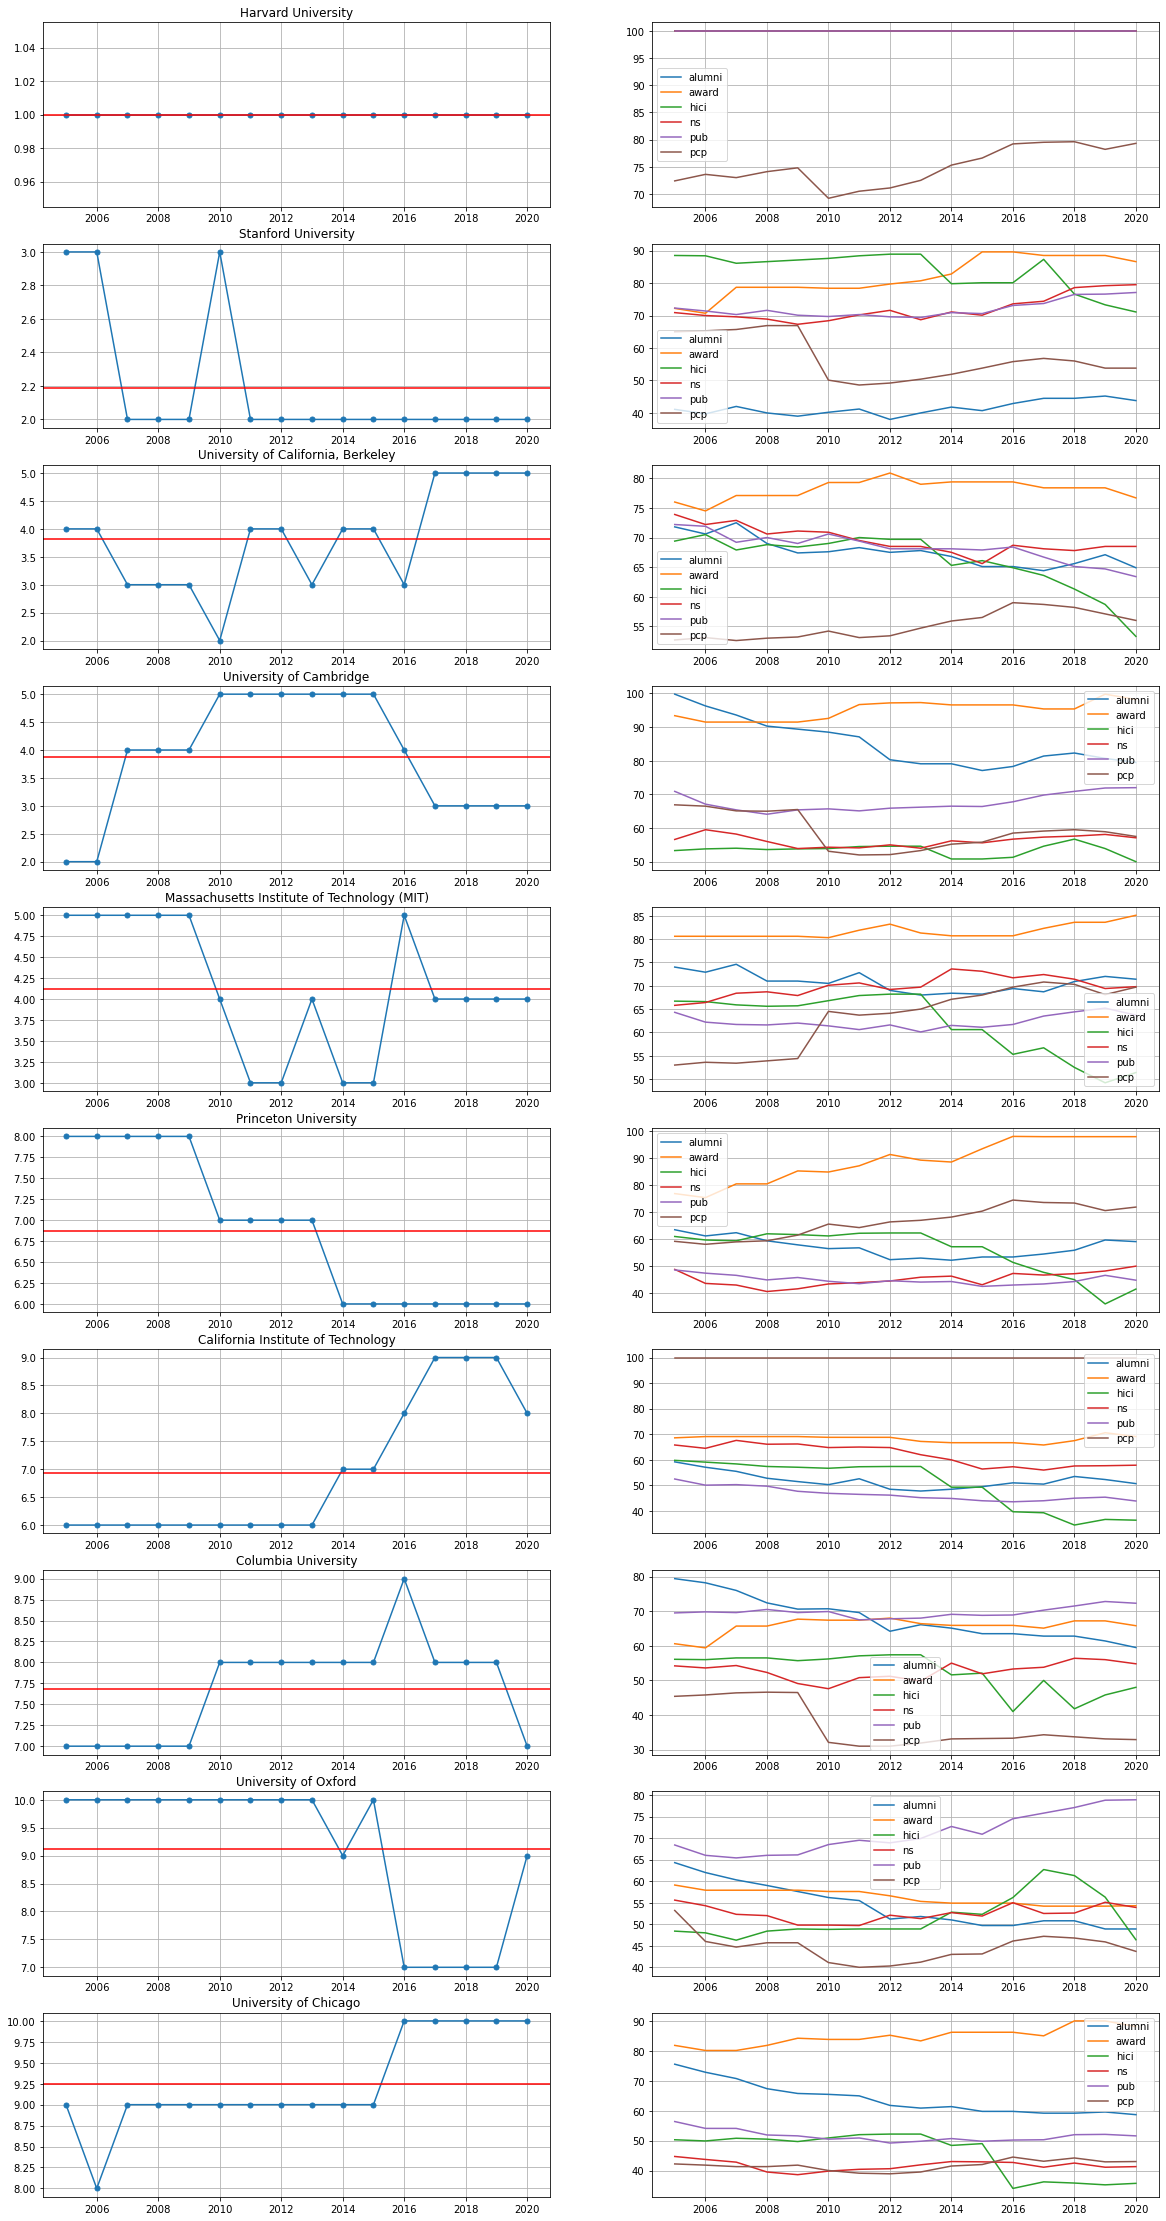

In [2]:
data_path = "C:\\Users\\jieyo\\OneDrive\\Data Science\\semester-project\\data\\"

files = [
    'ARWU.csv',
    'CWUR.csv',
    'educational_attainment_supplementary_data.csv',
    'school_and_country_table.csv',
    'timesData.csv'
]
data_files = [os.path.join(data_path, f) for f in files]
ARWU = pd.read_csv(data_files[0])
# 16 yrs of university ranking
yrs = np.unique(ARWU.year)
U_df_per_yr = {yr : ARWU[ARWU.year== yr]  for yr in yrs}
top_10 = pd.DataFrame()
for yr in yrs:
    top_10 = top_10.append(U_df_per_yr[yr].iloc[:10])
top_10.world_rank = top_10.world_rank.astype(int)
new_rank = []
for U in top_10.university_name.unique():
    ranks = top_10[top_10.university_name == U].world_rank
    print("range of ranking {U} : {range}, mean: {mean}".format(U=U,
                                                          range=ranks.max() - ranks.min(), 
                                                          mean=ranks.mean()
                                                         ))
    new_rank.append( ( ranks.mean(), U ) )
print()
new_rank = sorted(new_rank)
for  v in new_rank:
    print("{U} rank {R} ".format(U = v[1], R = v[0]) )
print()

s = '''
We can see that the top 10 university is always the 10 universities

Harvard University is always the No.1

the other 9 universities' rankings change in the range of 3, 

and if rank these university by the mean of thier rank from 2005 to 2006, 

we have a relative ranking
- No.1 Harvard University 
- No.2 Standford University
- No.3 University of California, Berkeley and University of Cambridge
- No.5 MIT
- No.6 Princeton University and California Institue of Technology
- No.8 Columbia University 
- No.9 University of Oxford and University of Chicago

'''
print(s)
print()
fig, axs = plt.subplots(10, 2, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i][0].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10)
    axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].alumni, label='alumni')
    axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award, label='award')
    axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici, label='hici')
    axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns, label='ns')
    axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub, label='pub')
    axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp, label='pcp')
    axs[i][1].legend()
    axs[i][0].axhline(ranks.mean(), c='r')
    axs[i][0].set_title(U)
    
    axs[i][0].grid()
    axs[i][1].grid()
plt.savefig("top_10_ranking_change.pdf")

In [4]:
from sklearn import preprocessing
sub = top_10.loc[:, "total_score": "pcp"]
cols = list(sub.columns)
pd.DataFrame(preprocessing.scale(sub), columns= cols)
top_10_scaled = top_10.copy()
top_10_scaled.loc[:, "total_score":"pcp"] = pd.DataFrame(preprocessing.scale(sub), columns= cols)

In [5]:
top_10

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...
6902,6,Princeton University,5,61.1,59.0,97.9,41.4,49.9,44.7,71.8,2020
6903,7,Columbia University,6,58.6,59.5,65.8,48.0,54.8,72.3,32.9,2020
6904,8,California Institute of Technology,7,57.7,50.7,69.1,36.4,57.9,43.9,100.0,2020
6905,9,University of Oxford,2,57.2,48.9,54.3,46.4,53.9,78.9,43.7,2020


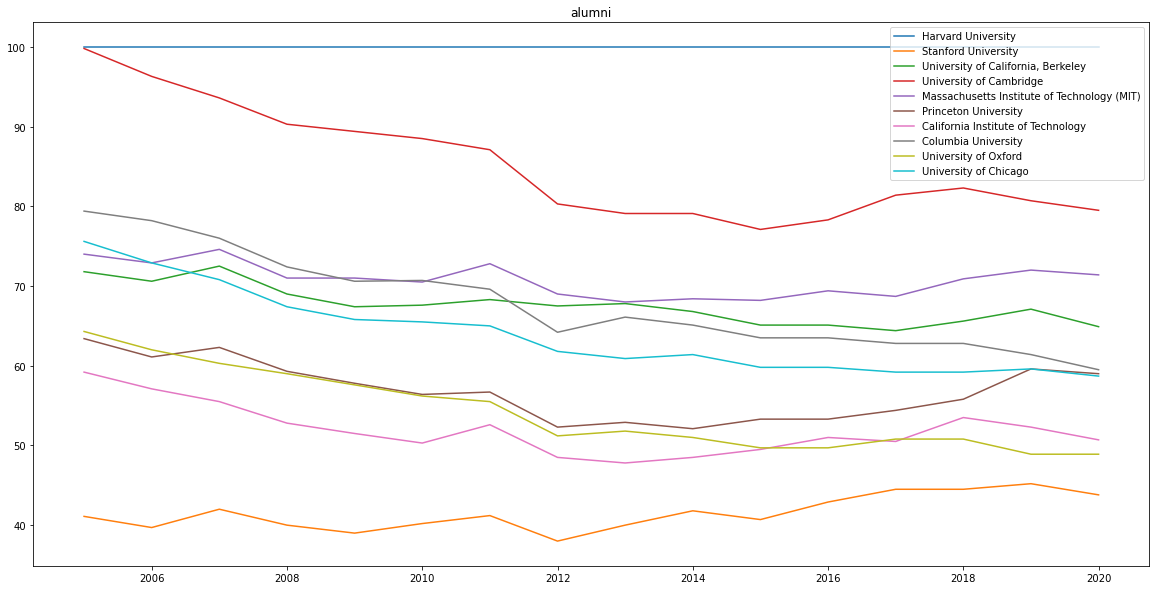

In [31]:
plt.figure(figsize=(20, 10))
for U in new_rank:
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    plt.plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].alumni, label=U)
    plt.legend()
    plt.title("alumni")

comparing the "Alumni of an institution winning Nobel Prizes and Fields Medals": 

We can see that Stanford University is the last all the time, but it ranked almost all the time, just 3 of the 15 years are ranked No.3, 

therefore, we can say that the "Alumni of an institution winning Nobel Prizes and Fields Medals" 

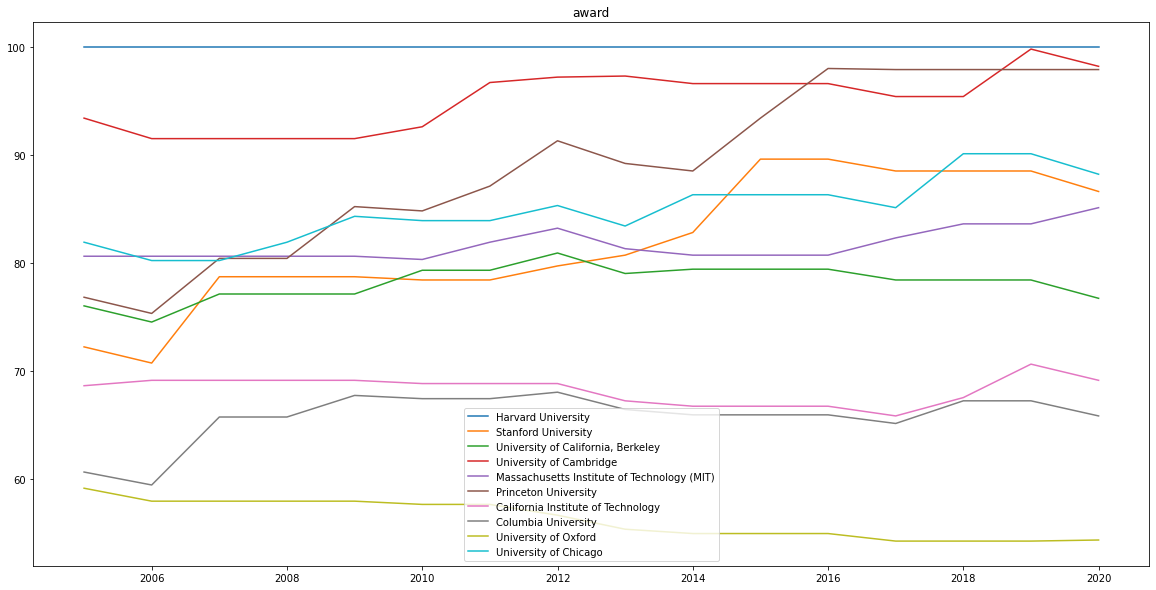

In [32]:
plt.figure(figsize=(20, 10))
for U in new_rank: 
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    plt.plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award, label=U)
    plt.legend()
    plt.title("award")

Comparing "Staff of an institution winning Nobel Prizes and Fields Medals", 

Princeton University is increasing significately, but the ranking was dropping,

but Columbia University was increasing from 2006 to 2009, but its ranking is dropping. 

therefore it looks like the 

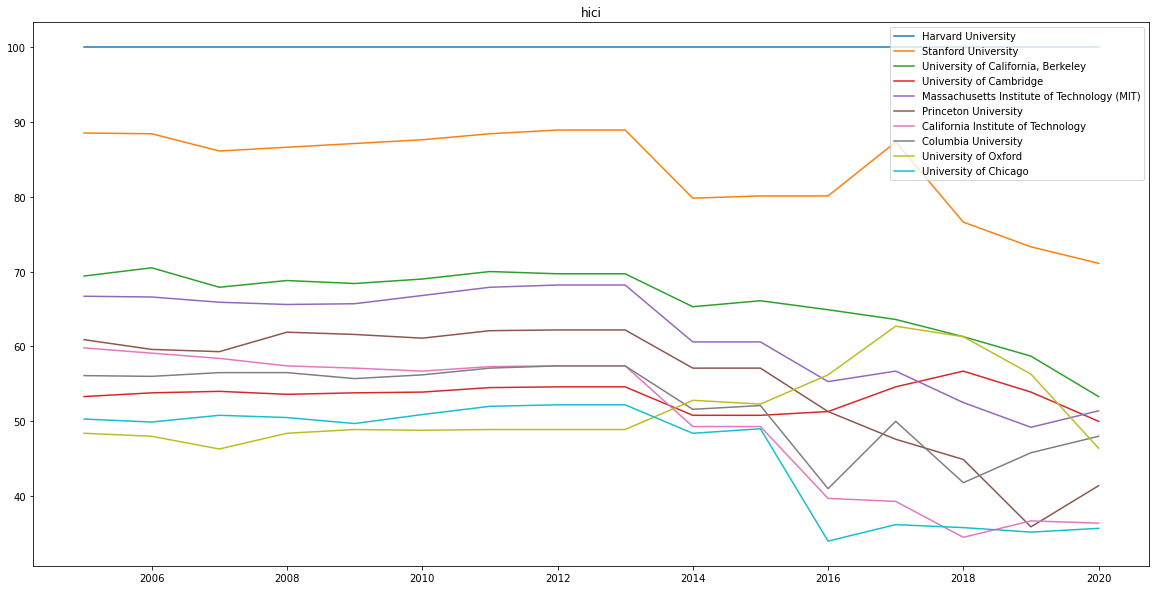

In [33]:
plt.figure(figsize=(20, 10))
for U in new_rank: 
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    plt.plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici, label=U)
    plt.legend()
    plt.title("hici")

In [ ]:
Highly Cited Researchers: there are no significant trend regarding this. 

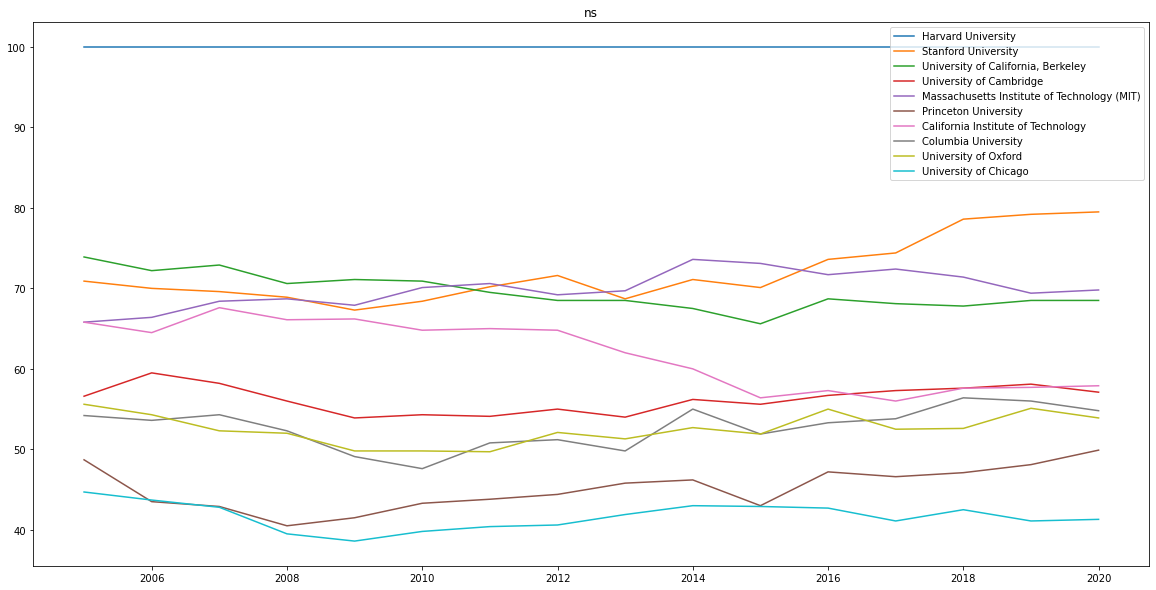

In [34]:
plt.figure(figsize=(20, 10))
for U in new_rank: 
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    plt.plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns, label=U)
    plt.legend()
    plt.title('ns')

Papers published in Nature and Science*

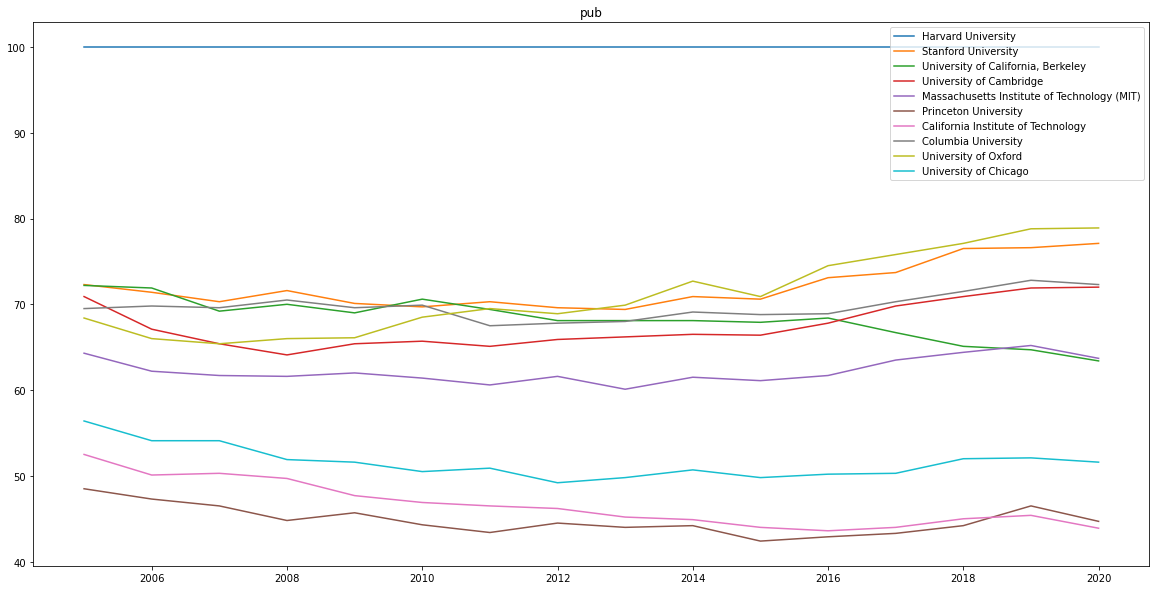

In [35]:
plt.figure(figsize=(20, 10))
for U in new_rank: 
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    plt.plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub, label=U)
    plt.legend()
    plt.title('pub')

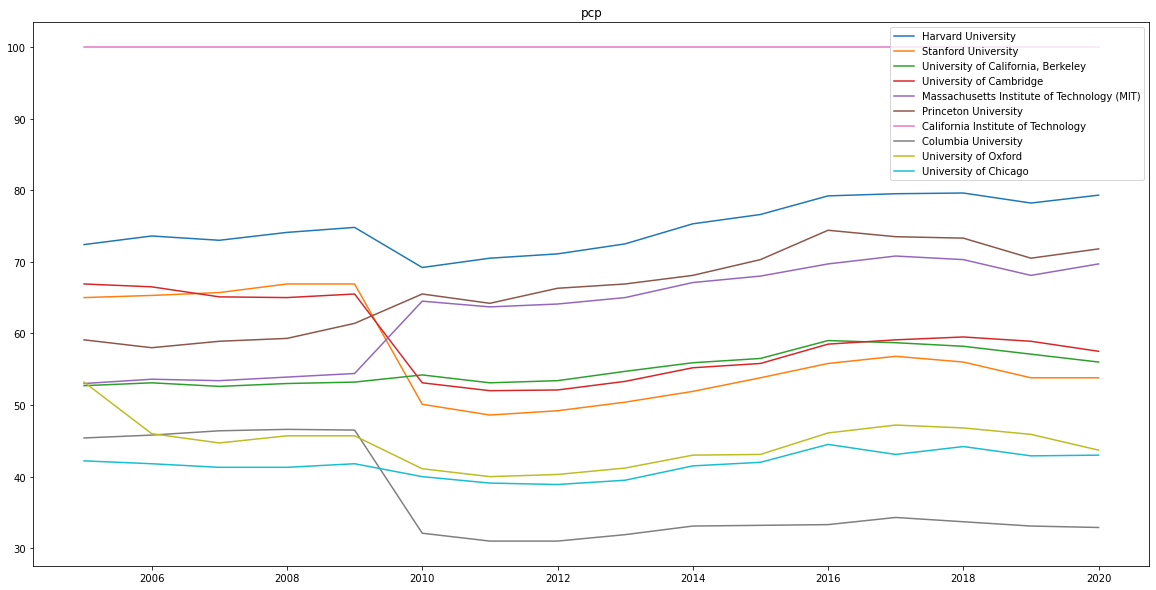

In [36]:
plt.figure(figsize=(20, 10))
for U in new_rank: 
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    plt.plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp, label=U)
    plt.legend()
    plt.title('pcp')

Per capita academic performance of an institution:

California  intitute of Technology ranked No. 1 regarding this attributes, but actually it ranked between 6 and 9, and most likly rank No.7. 

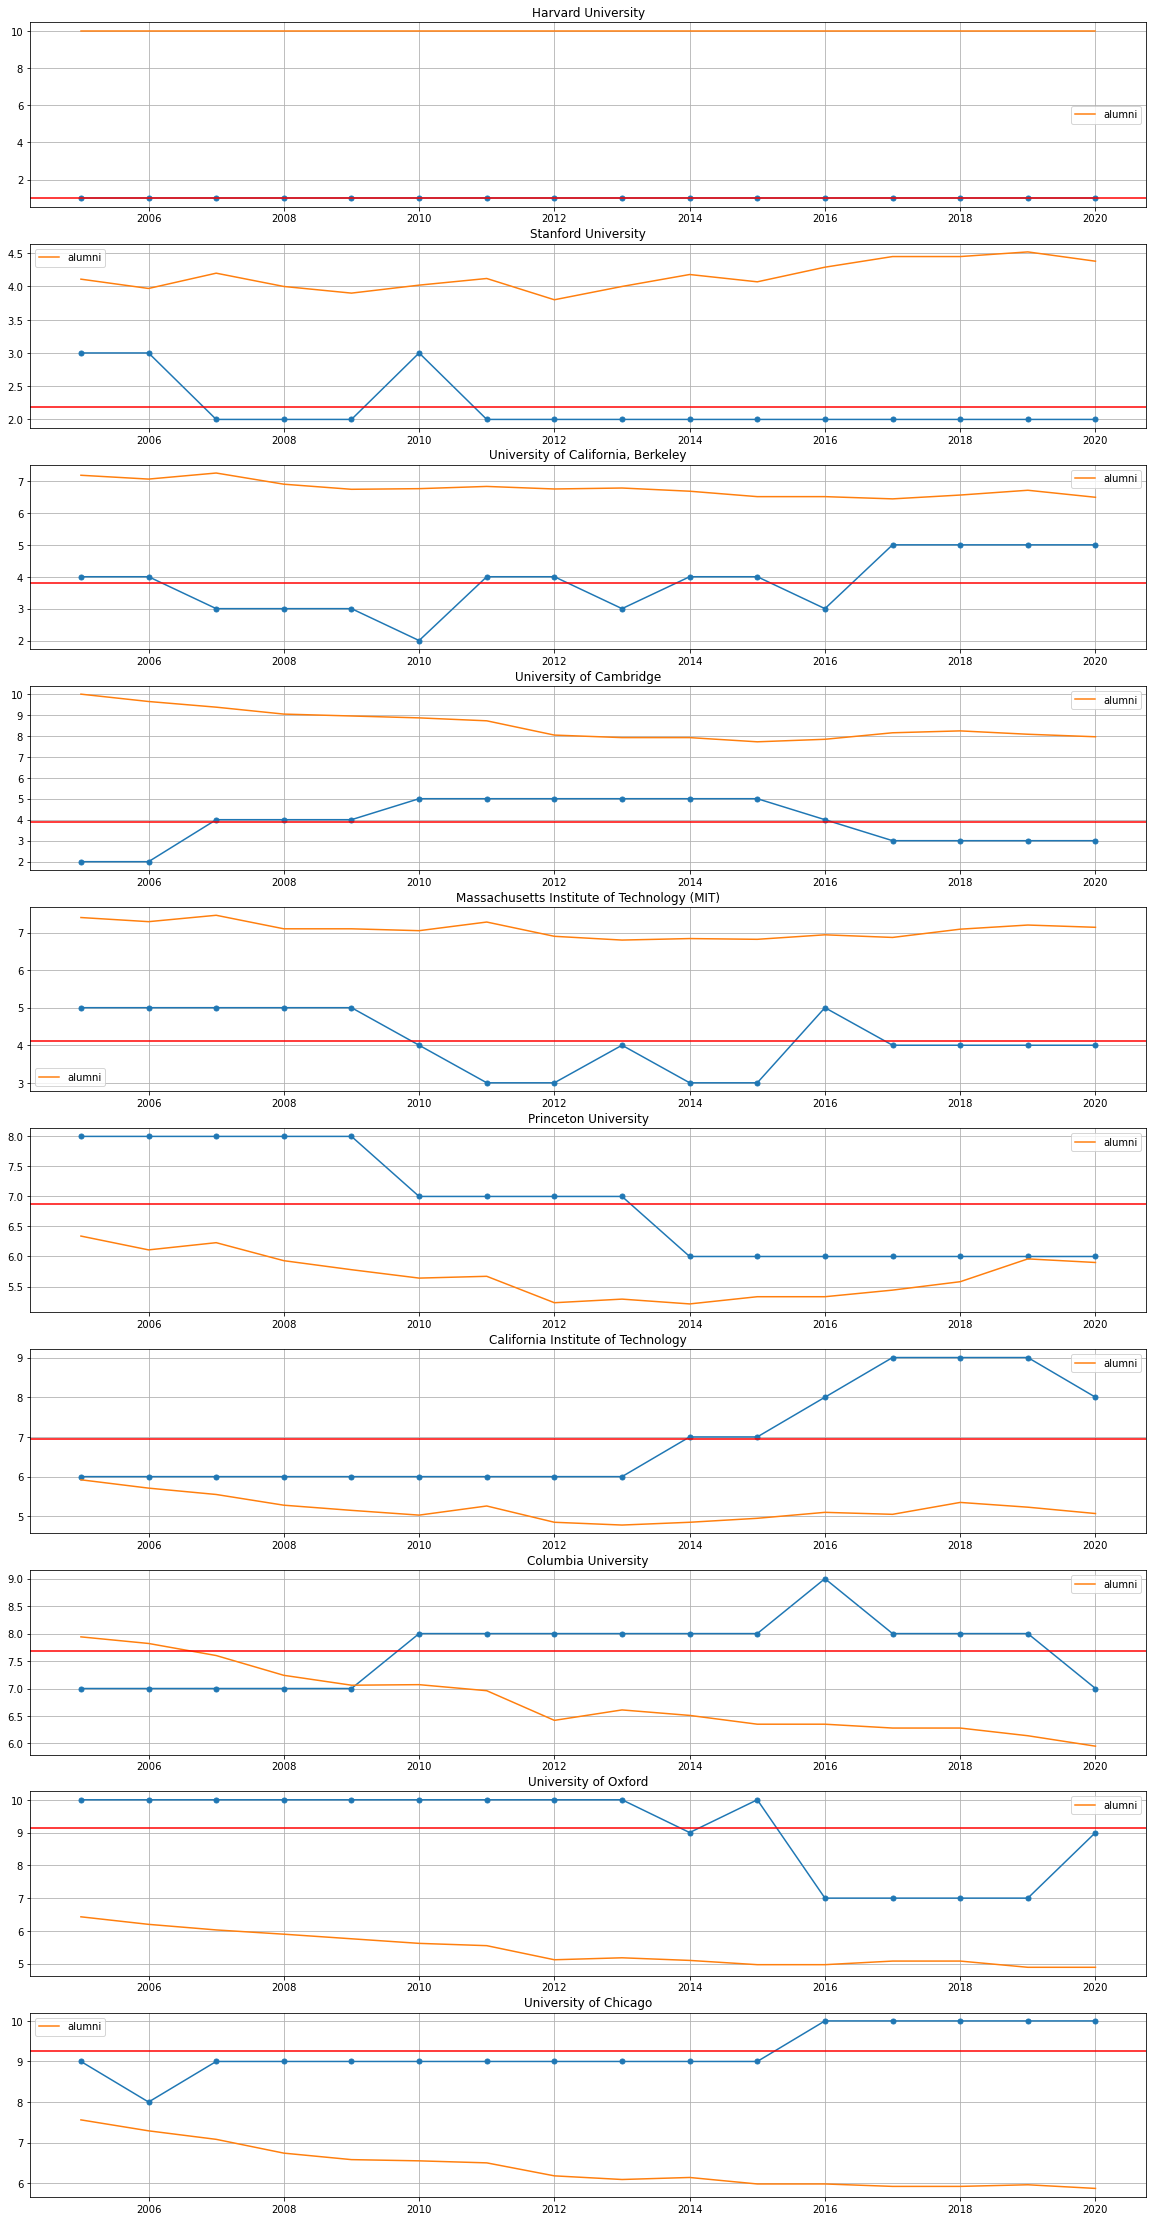

In [20]:
fig, axs = plt.subplots(10, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10)
    axs[i].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].alumni / 10, label='alumni')
    axs[i].legend()
    axs[i].axhline(ranks.mean(), c='r')
    axs[i].set_title(U)
    
    axs[i].grid()



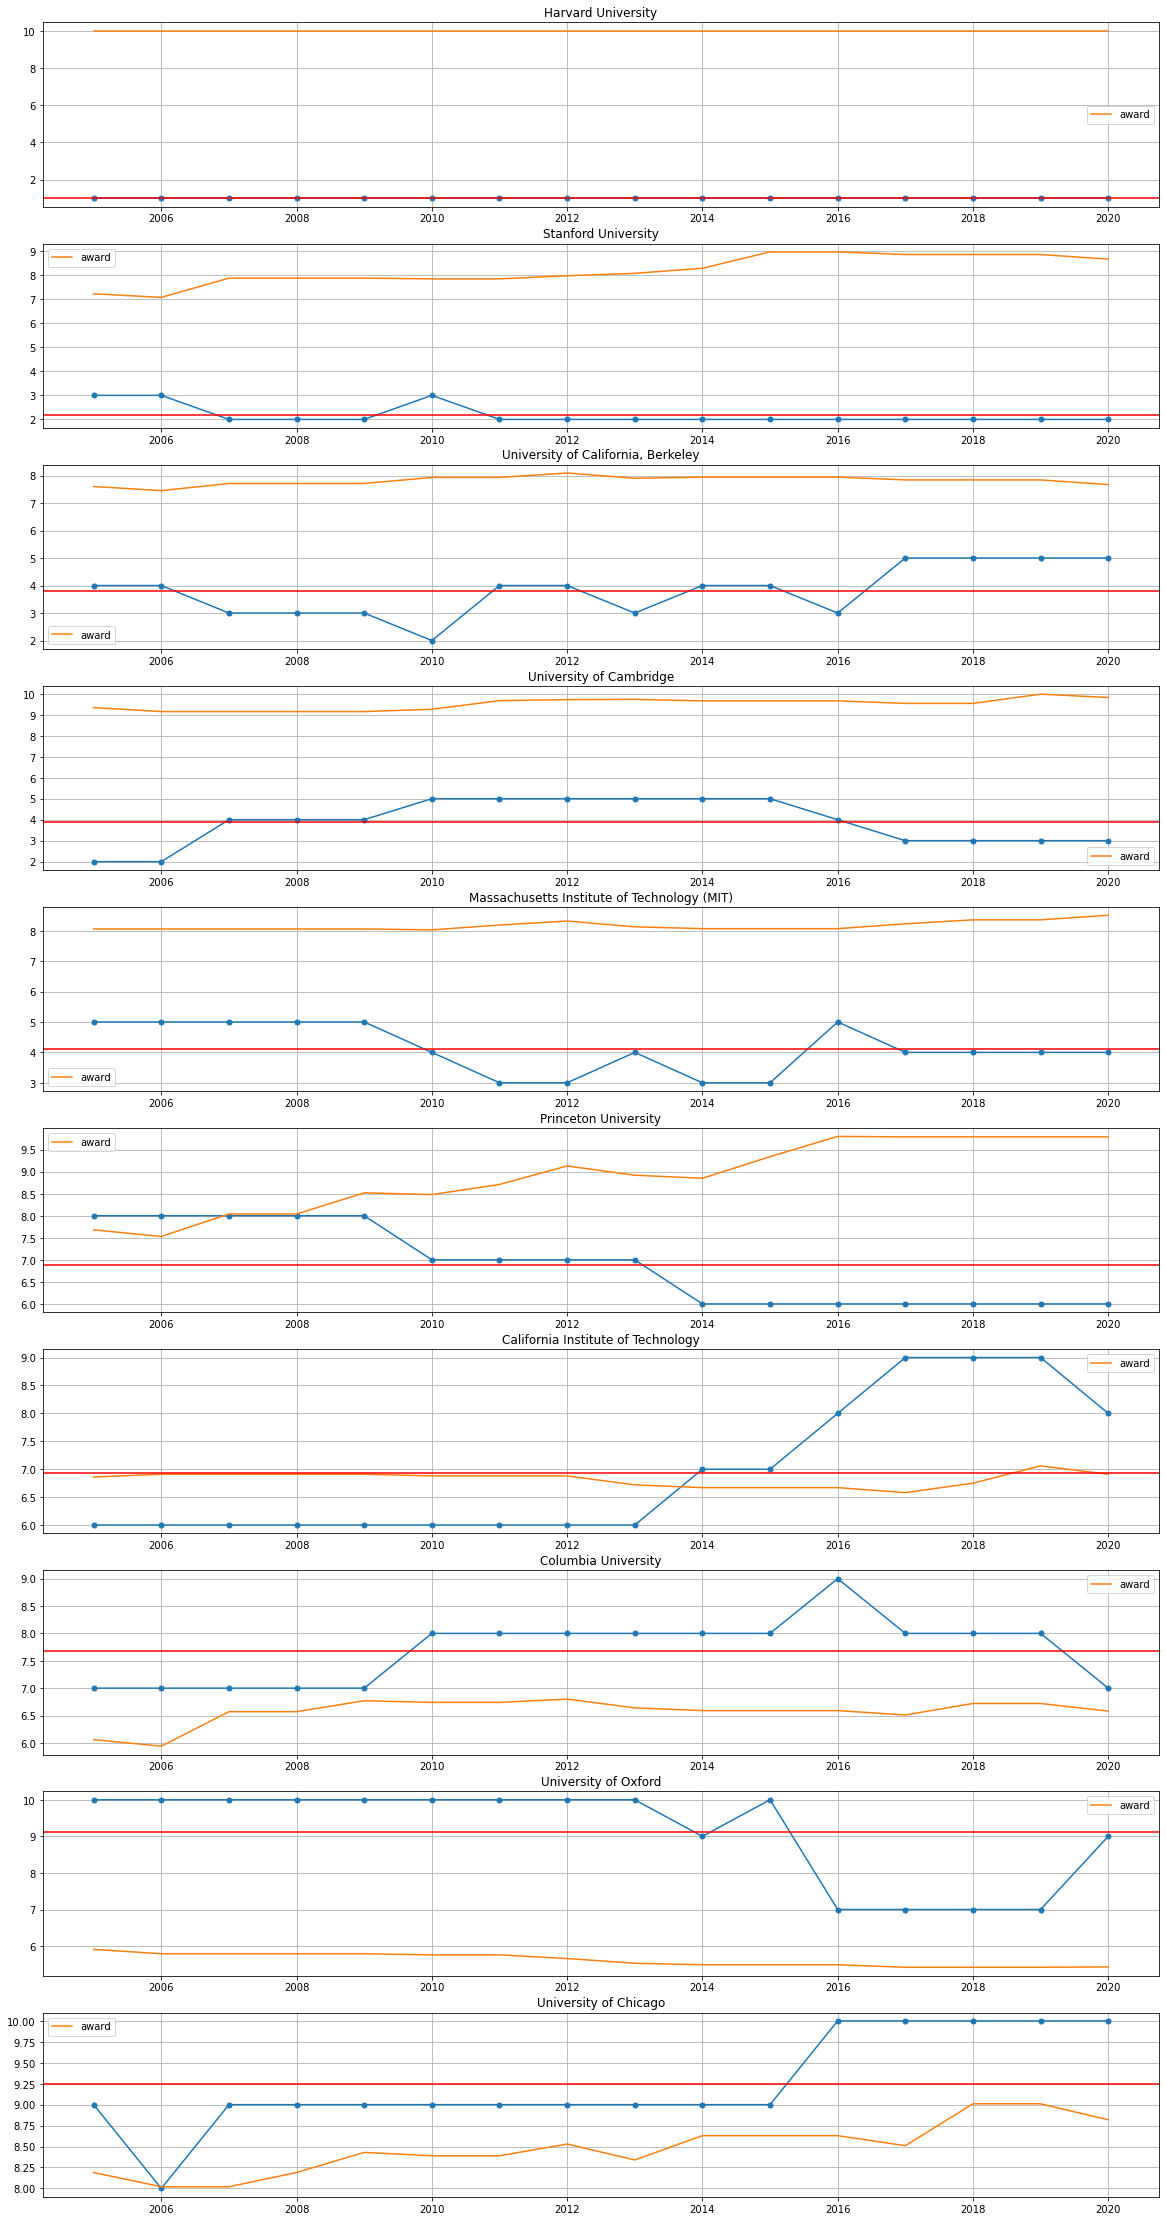

In [37]:
fig, axs = plt.subplots(10, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10)
    axs[i].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award / 10, label='award')
    axs[i].legend()
    axs[i].axhline(ranks.mean(), c='r')
    axs[i].set_title(U)
    
    axs[i].grid()

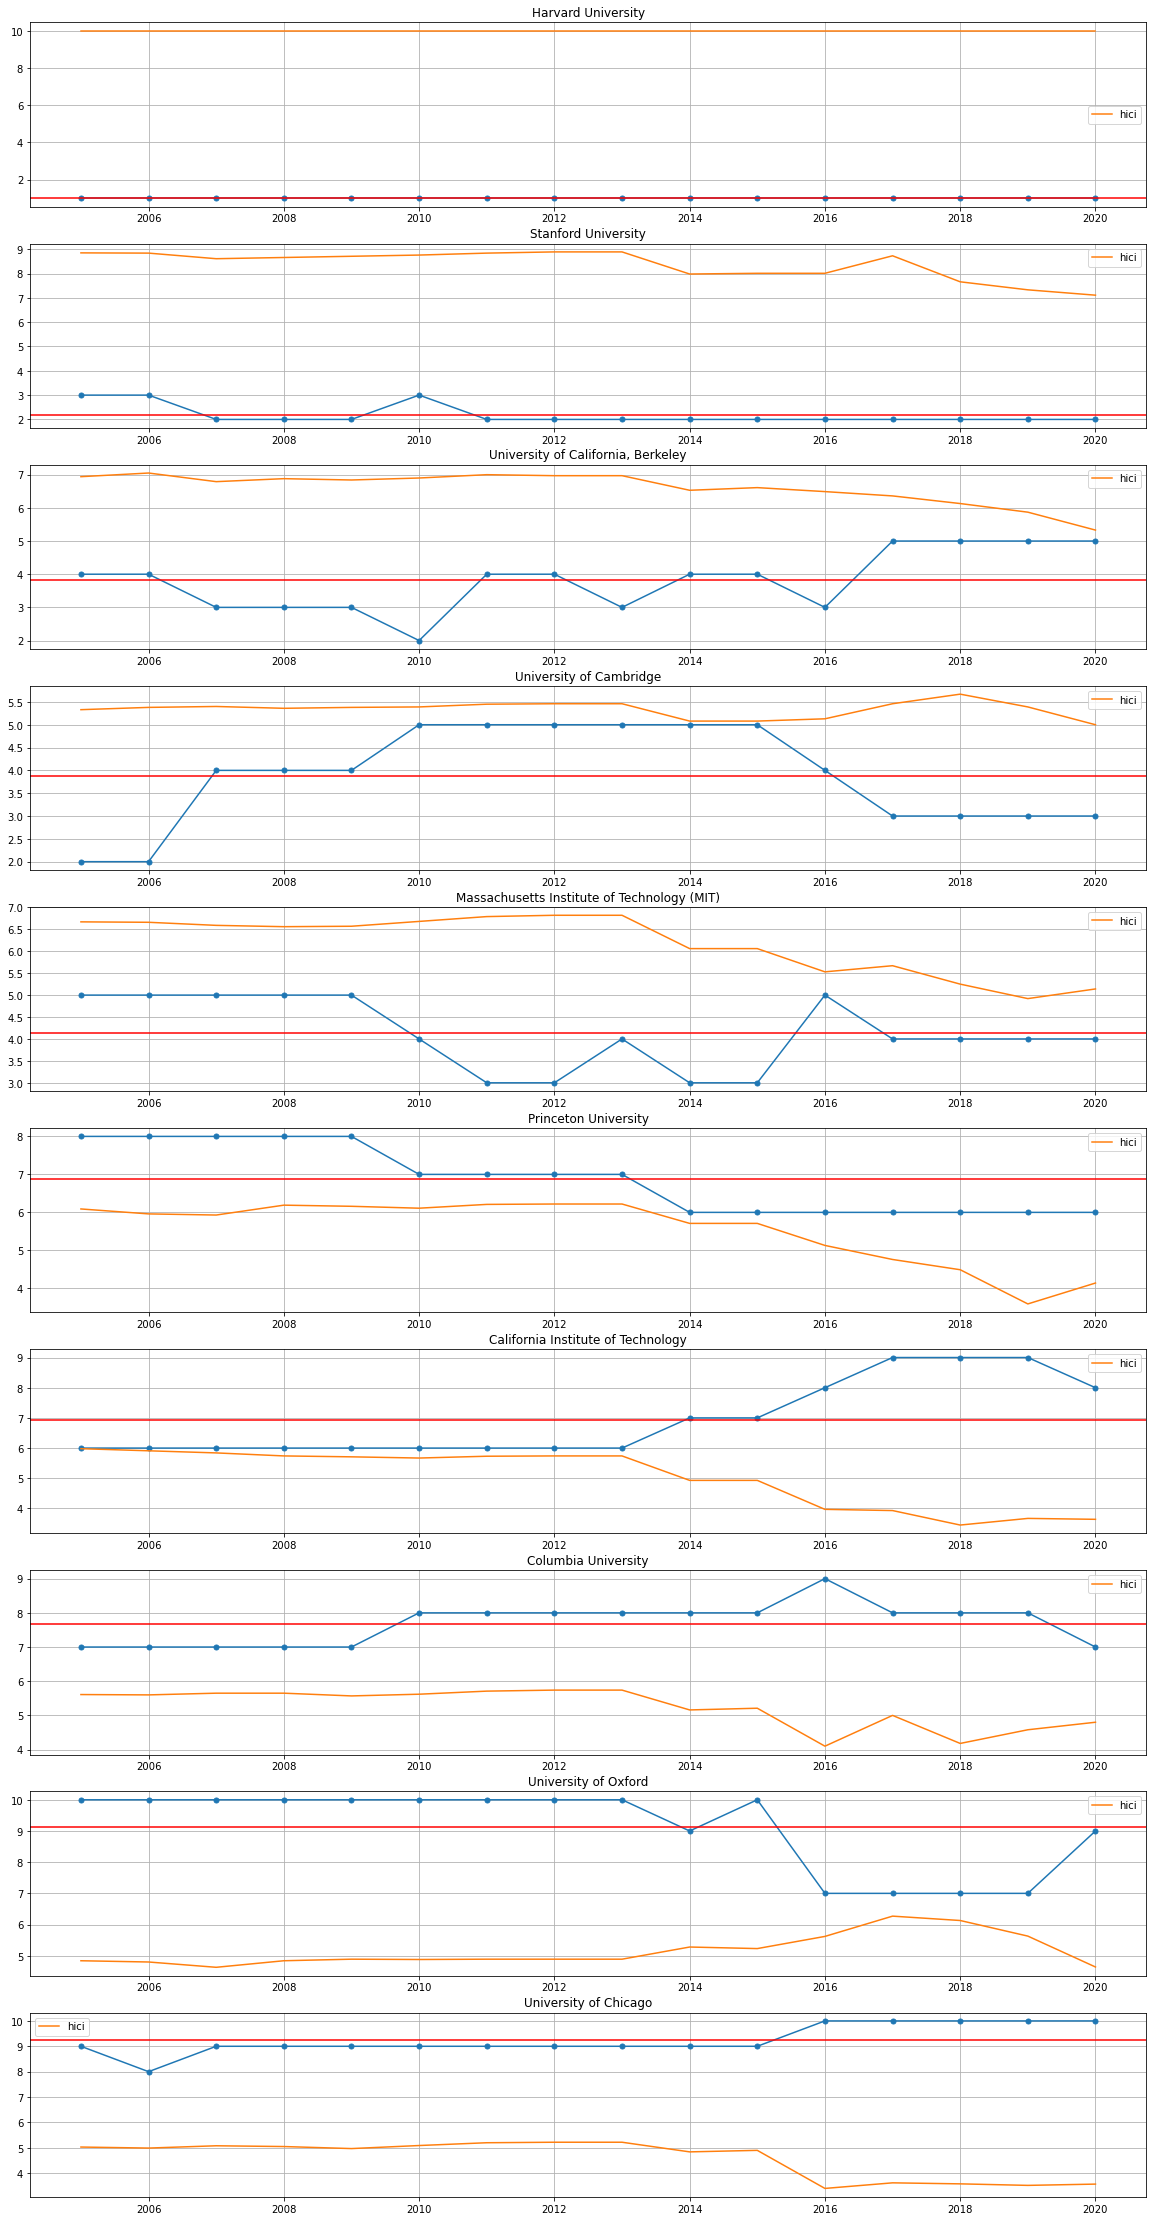

In [38]:
fig, axs = plt.subplots(10, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10)
    axs[i].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici / 10, label='hici')
    axs[i].legend()
    axs[i].axhline(ranks.mean(), c='r')
    axs[i].set_title(U)
    
    axs[i].grid()

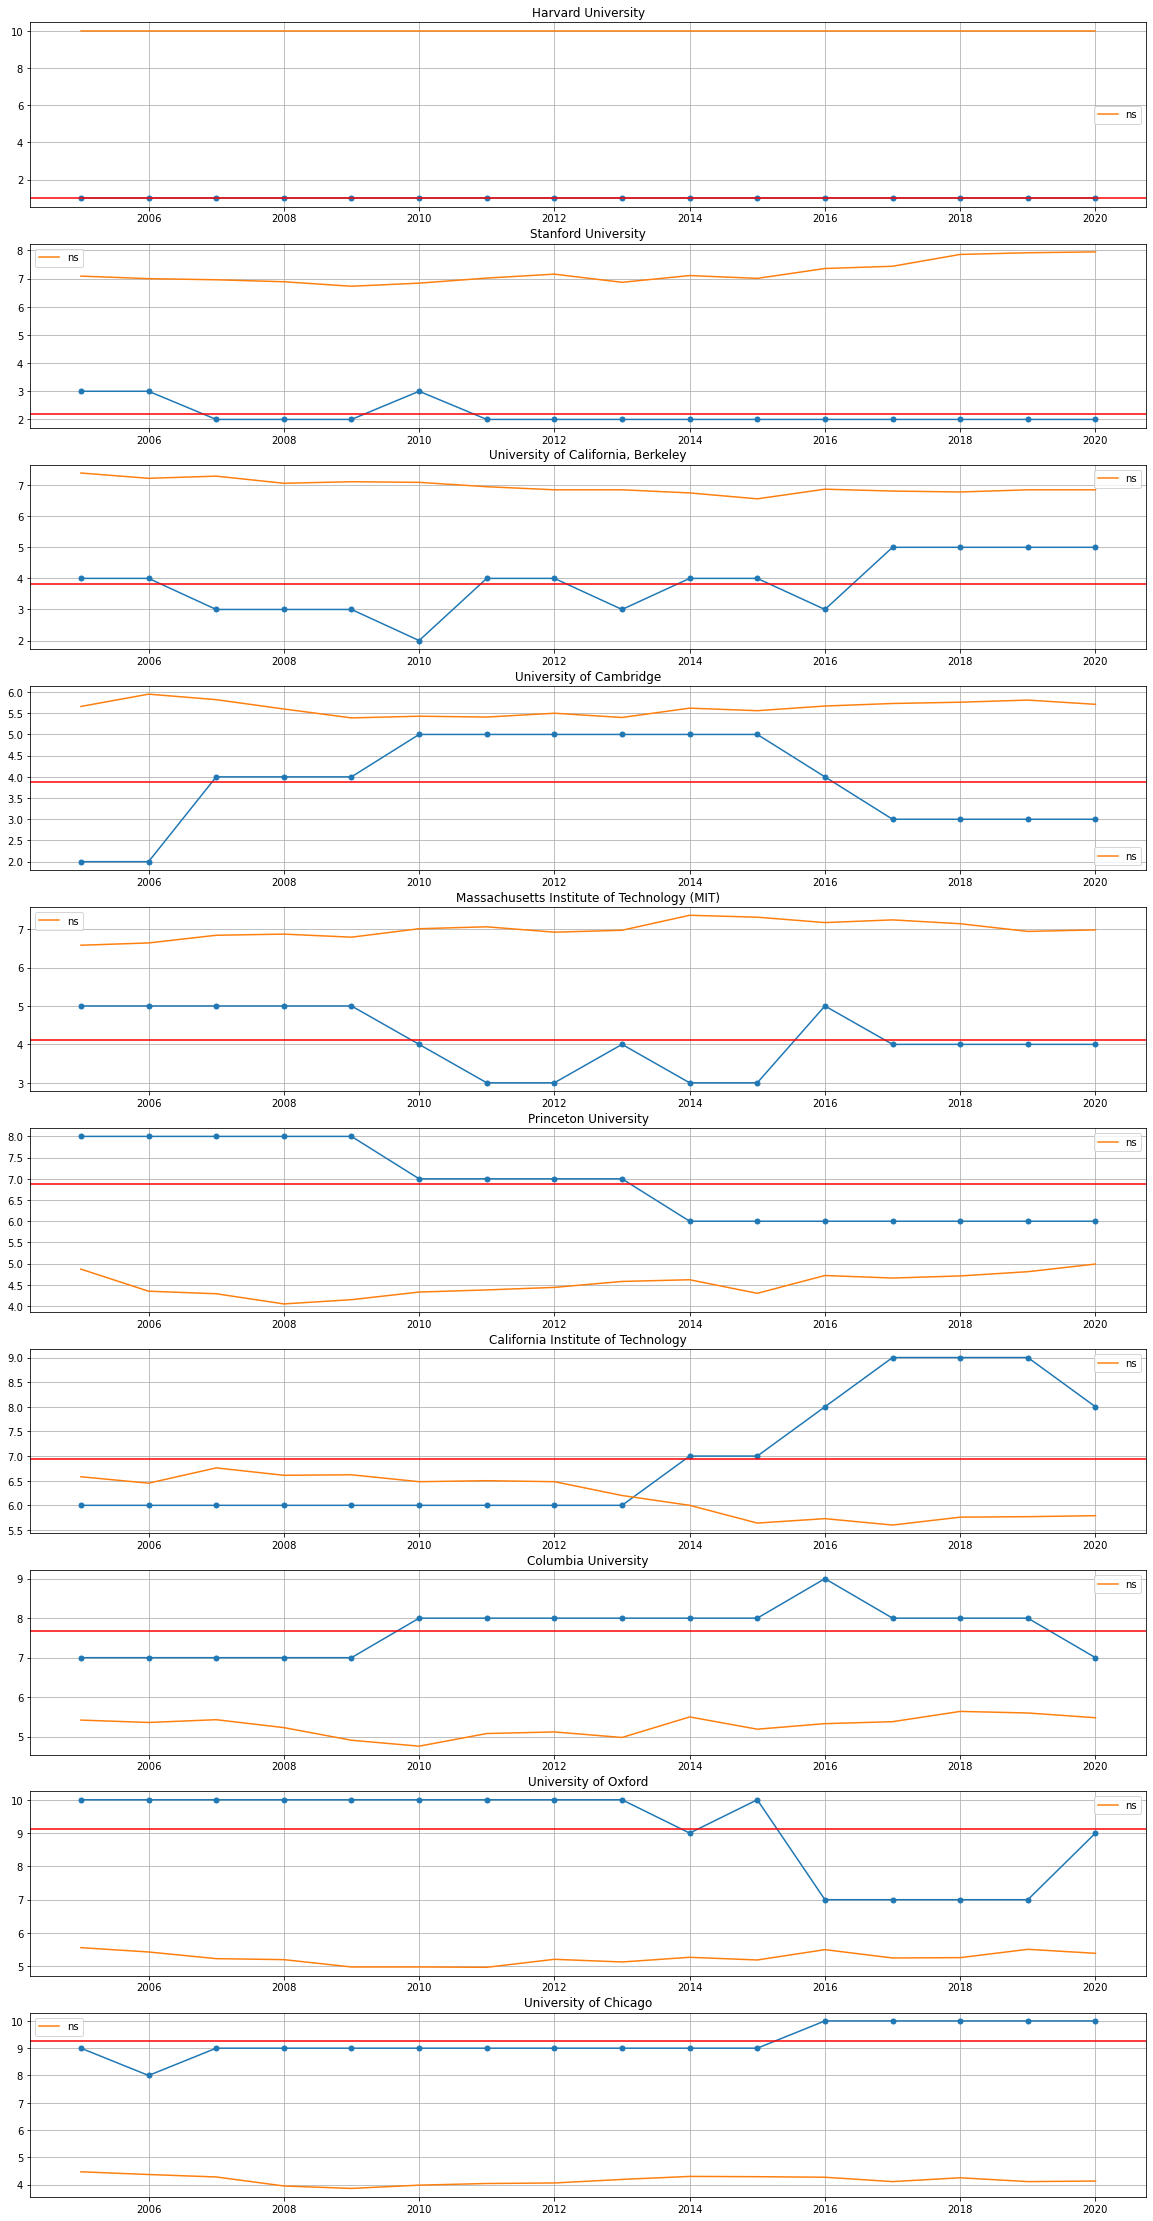

In [23]:
fig, axs = plt.subplots(10, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10)
    axs[i].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns / 10, label='ns')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award, label='award')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici, label='hici')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns, label='ns')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub, label='pub')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp, label='pcp')
    axs[i].legend()
    axs[i].axhline(ranks.mean(), c='r')
    axs[i].set_title(U)
    
    axs[i].grid()

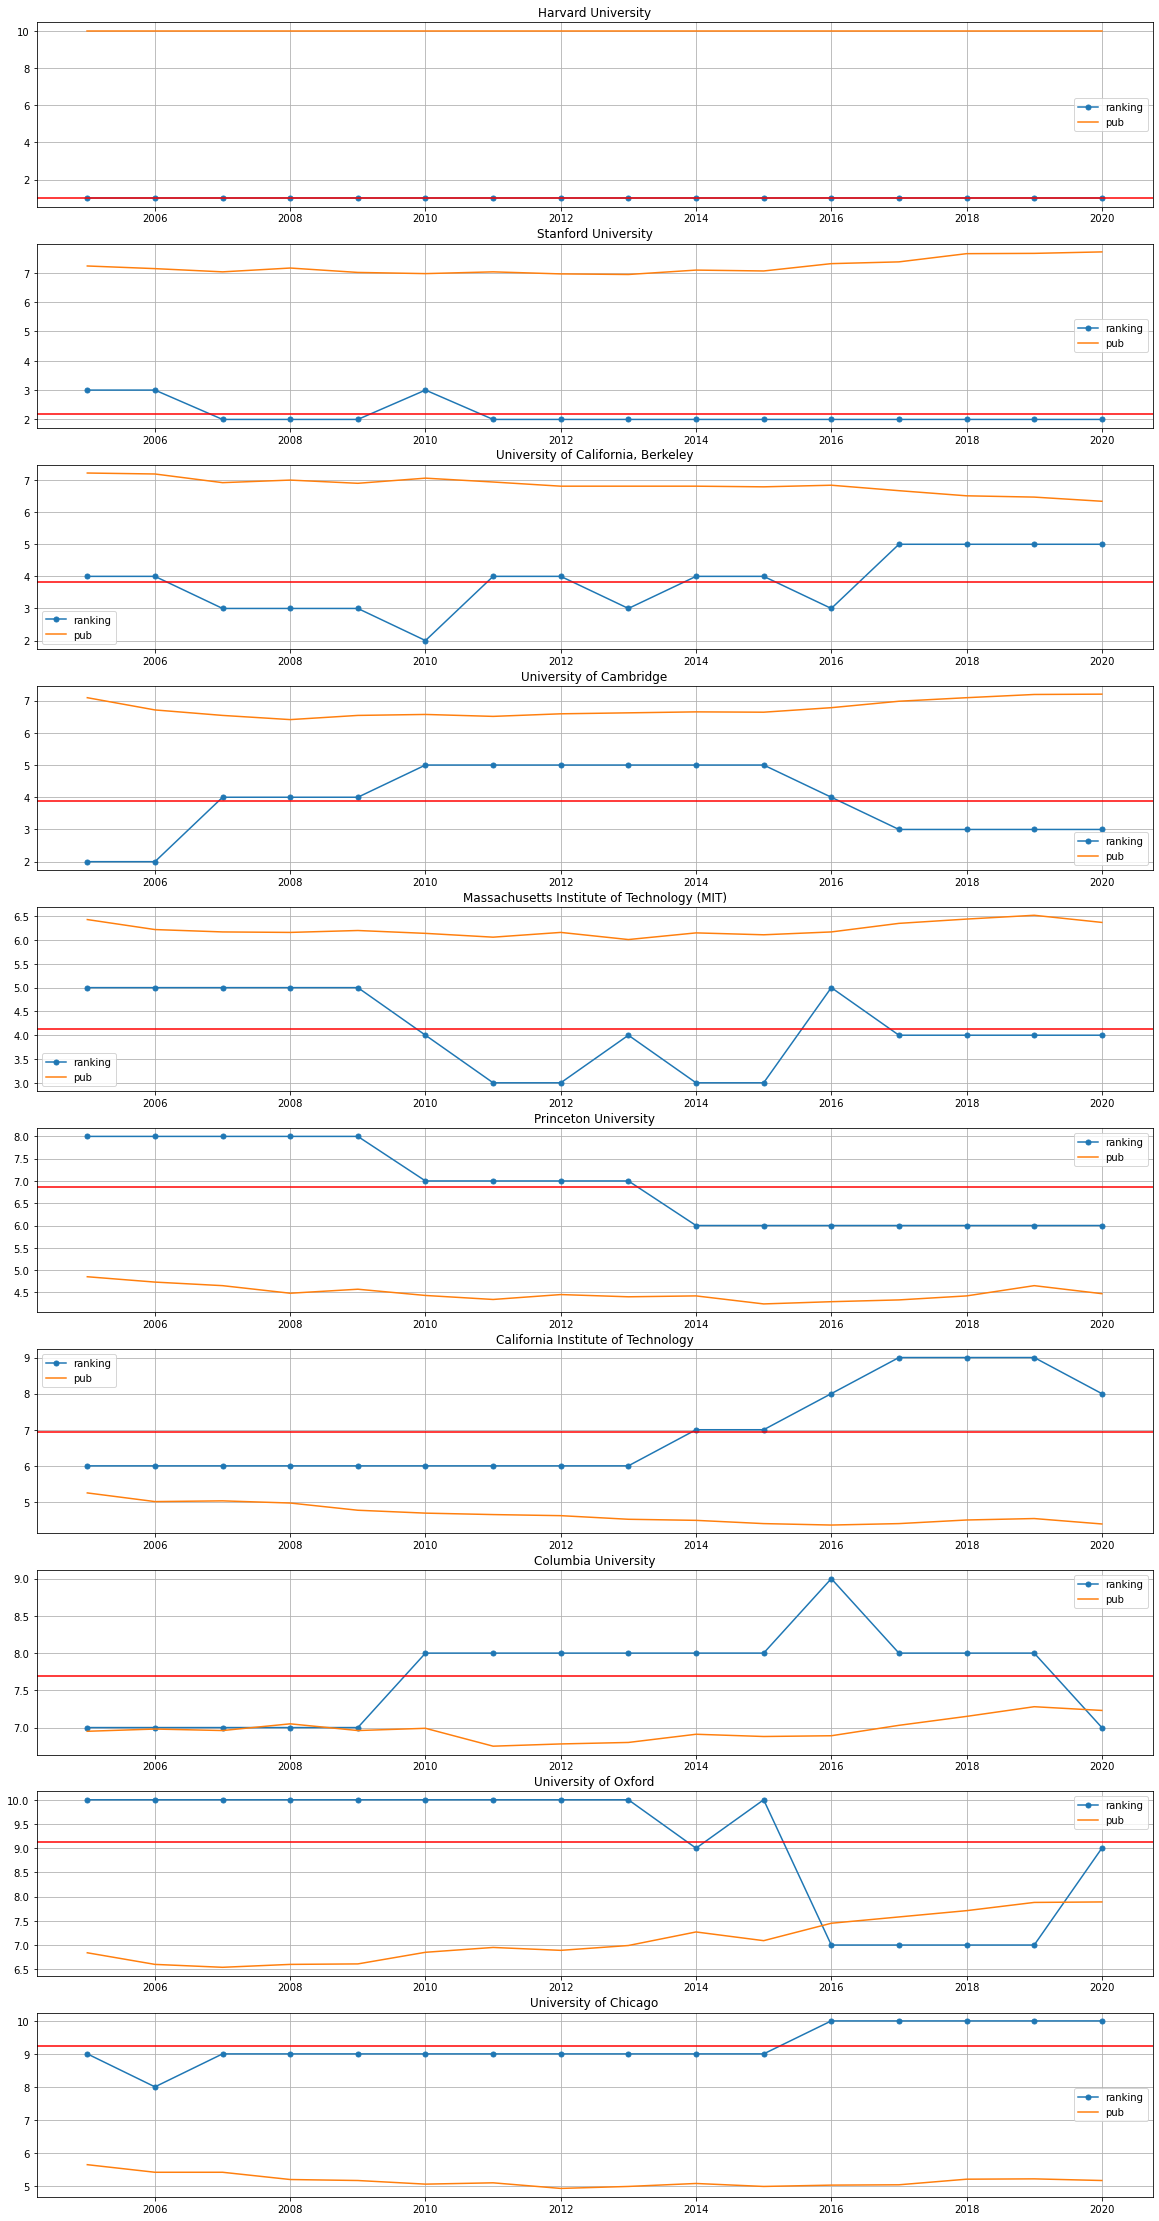

In [25]:
fig, axs = plt.subplots(10, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10, label='ranking')
    axs[i].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub / 10, label='pub')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award, label='award')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici, label='hici')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns, label='ns')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub, label='pub')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp, label='pcp')
    axs[i].legend()
    axs[i].axhline(ranks.mean(), c='r', label="mean rank")
    axs[i].set_title(U)
    
    axs[i].grid()

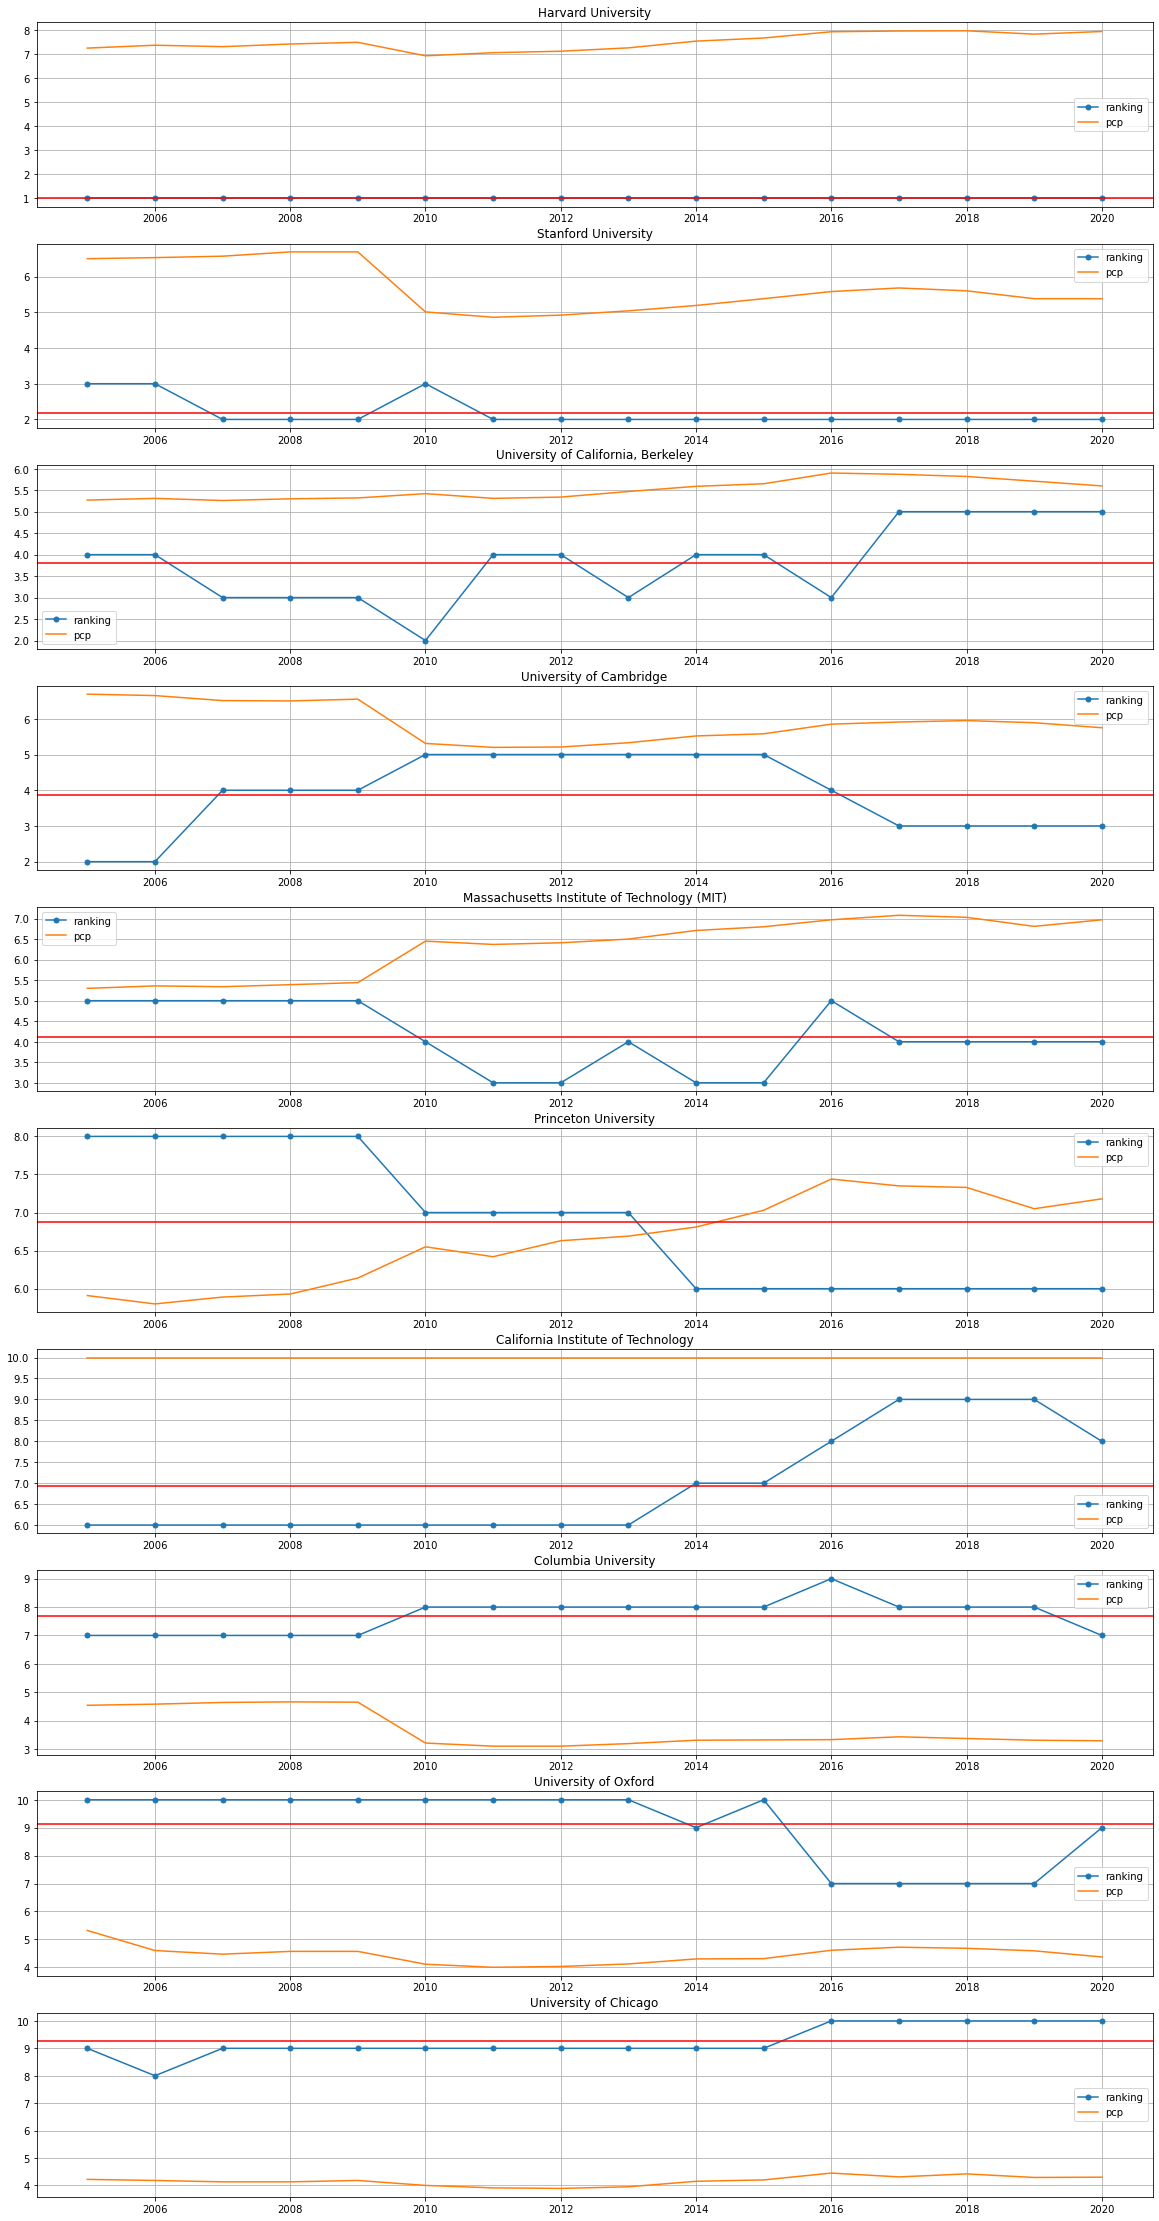

In [26]:
fig, axs = plt.subplots(10, figsize=(20,40))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[i].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10, label='ranking')
    axs[i].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp / 10, label='pcp')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award, label='award')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici, label='hici')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns, label='ns')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub, label='pub')
#     axs[i][1].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp, label='pcp')
    axs[i].legend()
    axs[i].axhline(ranks.mean(), c='r')
    axs[i].set_title(U)
    
    axs[i].grid()

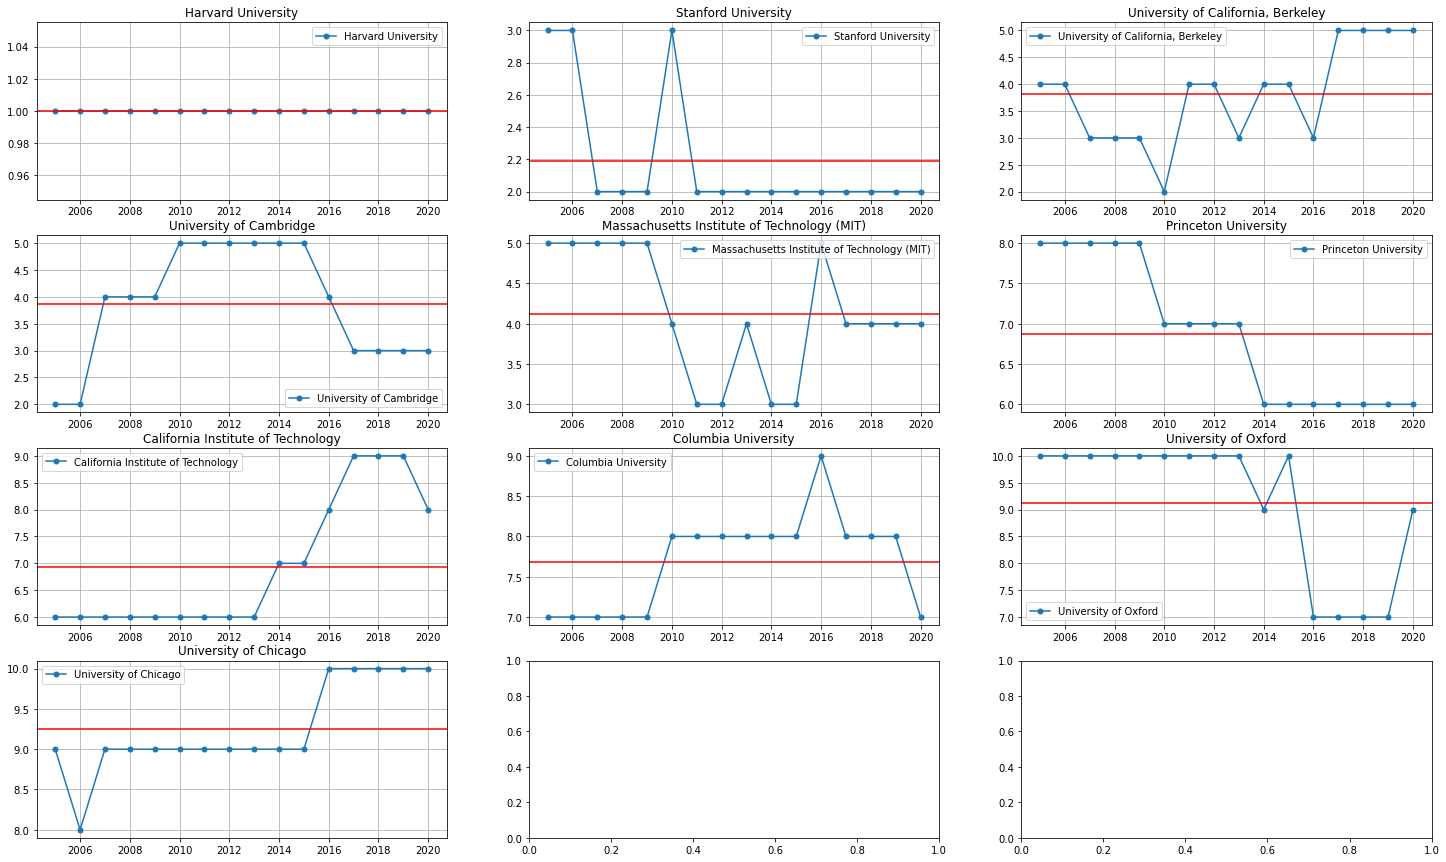

In [45]:
fig, axs = plt.subplots(4, 3, figsize=(25,15))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10, label=U)

    axs[int(i/3)][i%3].legend()
    axs[int(i/3)][i%3].axhline(ranks.mean(), c='r')
    axs[int(i/3)][i%3].set_title(U)
    
    axs[int(i/3)][i%3].grid()


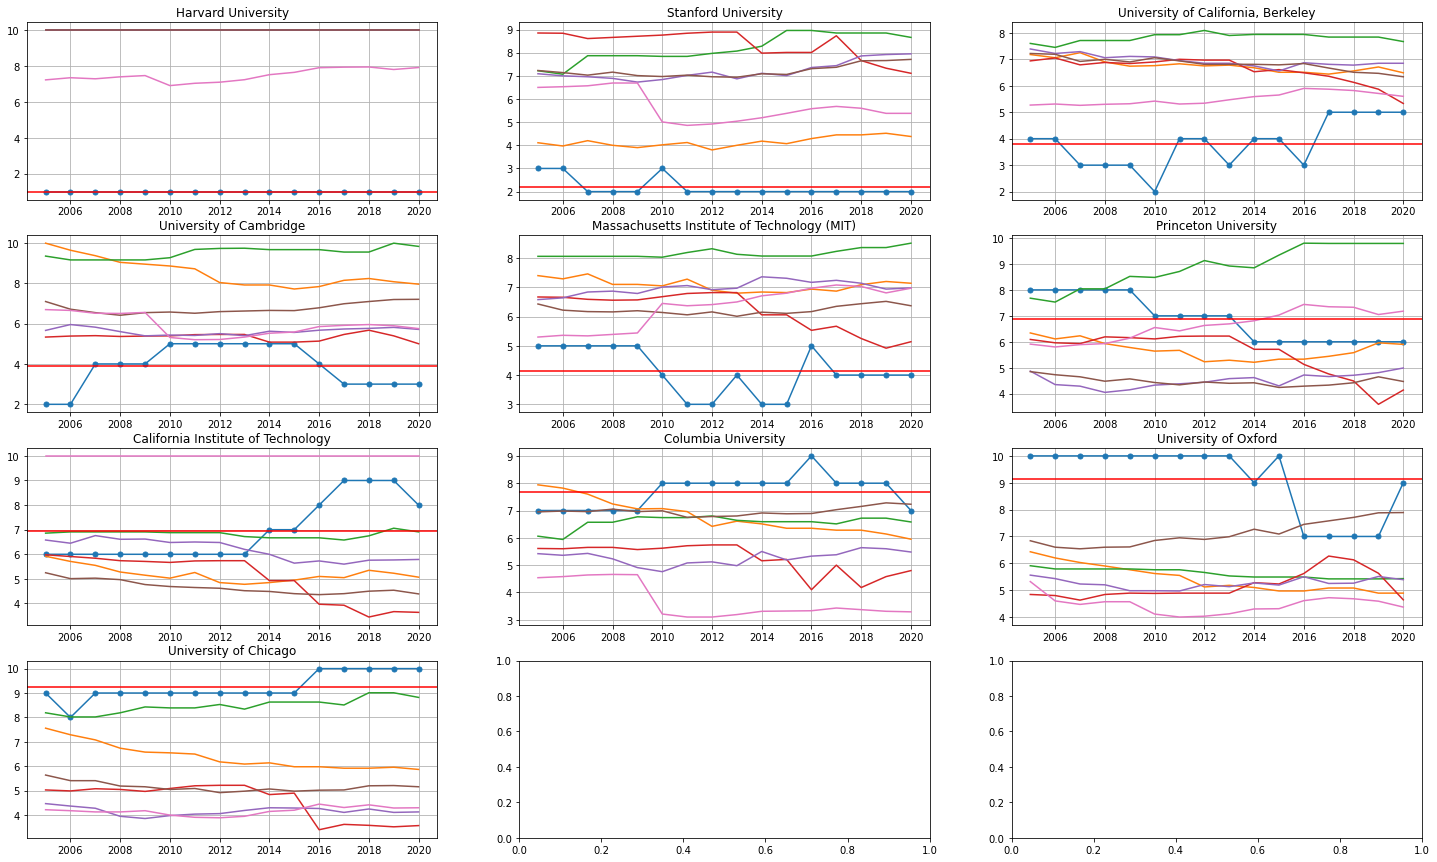

In [48]:
fig, axs = plt.subplots(4, 3, figsize=(25,15))
for i, U in zip(range(10), new_rank):
    U = U[1]
    ranks = top_10[top_10.university_name==U].world_rank
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10, label=U)
#     axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year,ranks, marker=".", markersize=10)
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].alumni / 10, label='alumni')
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].award /10, label='award')
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].hici/10, label='hici')
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].ns/10, label='ns')
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pub/10, label='pub')
    axs[int(i/3)][i%3].plot(top_10[top_10.university_name== U].year, top_10[top_10.university_name== U].pcp/10, label='pcp')

#     axs[int(i/3)][i%3].legend()
    axs[int(i/3)][i%3].axhline(ranks.mean(), c='r')
    axs[int(i/3)][i%3].set_title(U)
    
    axs[int(i/3)][i%3].grid()

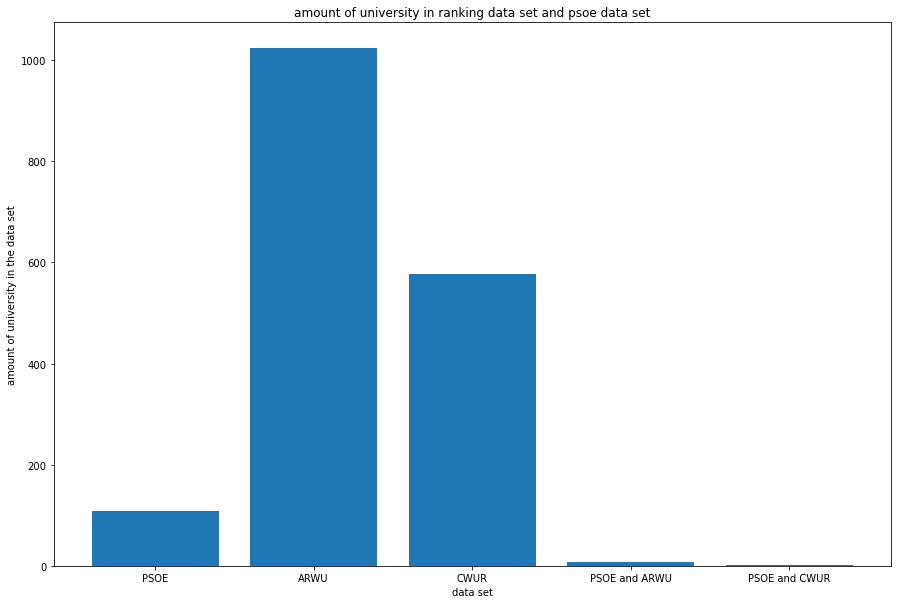

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
U = pd.read_csv("data/U.csv", header=None)

U0, U1, U2 = U[0].dropna(), U[1].dropna(), U[2].dropna()
U0 = {U0[i].replace('\n', ' ') for i in range(U0.shape[0])}
U1 = {U1[i].replace('\n', ' ') for i in range(U1.shape[0])}
U2 = {U2[i].replace('\n', ' ') for i in range(U2.shape[0])}

Universities = U0.intersection(U1).union(U0.intersection(U2))# , U0.intersection(U2)

U0.intersection(U1).union(U0.intersection(U2)) , U0.intersection(U2)

ARWU = pd.read_csv('data/ARWU.csv')
ARWU_target = ARWU[ARWU.university_name.isin( Universities)]
t = ARWU_target.university_name.unique()
d = { name: ARWU_target[ARWU_target.university_name == name] for name in t}

CWUR = pd.read_csv("data/CWUR.csv")
CWUR_target = CWUR[CWUR.institution.isin(Universities)]
f  = CWUR_target.institution.unique()
d2 = {name: CWUR_target[CWUR_target.institution == name] for name in f}


X = ['PSOE', "ARWU", "CWUR", "PSOE and ARWU", "PSOE and CWUR"]
y = [len(U0), len(U1), len(U2), len(U0.intersection(U1)), len(U0.intersection(U2)) ]
X_pos = [i for i , _ in enumerate(X)]
plt.figure(figsize=(15, 10))
plt.bar(X_pos, y)
plt.xlabel("data set")
plt.ylabel("amount of university in the data set")
plt.title("amount of university in ranking data set and psoe data set")
plt.xticks(X_pos, X)
plt.show()